In [1]:
import pickle
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

In [2]:
FEATURE_ROOT = '/data1/zzl/ICCV/features'
MODEL_NAME = 'rnd_mix_edge'
DATASET = 'shoev1'

FEATURE_DIR = os.path.join(FEATURE_ROOT, MODEL_NAME, DATASET)

In [3]:
photo_feature = os.path.join(FEATURE_DIR, 'photo.pkl')
sketch_feature = os.path.join(FEATURE_DIR, 'sketch.pkl')

In [4]:
photo_data = pickle.load(open(photo_feature, 'rb'))
sketch_data = pickle.load(open(sketch_feature, 'rb'))

photo_name, photo_feature = photo_data['name'], photo_data['feature']
sketch_name, sketch_feature = sketch_data['name'], sketch_data['feature']

In [5]:
IMG_ROOT = '/data1/zzl/dataset'
DATASET_ROOT = 'sbir_cvpr2016/sbir_cvpr2016_release/sbir_cvpr2016/shoes/test'
DATASET_DIR = os.path.join(IMG_ROOT, DATASET_ROOT)

sketch_dir = os.path.join(DATASET_DIR, 'sketches')
photo_dir = os.path.join(DATASET_DIR, 'images')

In [6]:
combine_feature = np.concatenate((photo_feature, sketch_feature))

tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsen = tsne.fit_transform(combine_feature)

In [7]:
x = X_tsen[:, 0]

In [13]:
y = X_tsen[:, 1]

In [9]:
np.max(x)

12.973039

In [10]:
np.min(x)

-12.784529

In [14]:
np.max(y)

17.595728

In [15]:
np.min(y)

-16.607422

In [16]:
x = x - np.min(x)

In [17]:
y = y - np.min(y)

In [21]:
np.unique(x.astype(np.int))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [22]:
np.unique(y.astype(np.int))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34])

In [25]:
np.unique(np.round(x))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26.], dtype=float32)

In [26]:
reduced_transformed = X_tsen - np.min(X_tsen, axis=0)

In [27]:
reduced_transformed /= np.max(reduced_transformed, axis=0)

In [28]:
image_xindex_sorted = np.argsort(np.sum(reduced_transformed, axis=1))

In [52]:
image_width = 128

In [30]:
no_of_images = 230

In [53]:
merged_width = int(np.ceil(np.sqrt(no_of_images))*image_width)

In [58]:
merged_image = np.zeros((merged_width, merged_width, 3), dtype='uint8')

In [34]:
imgs = []
for p_name in photo_name:
    imgs.append(os.path.join(photo_dir, p_name))
for sk_name in sketch_name:
    imgs.append(os.path.join(sketch_dir, sk_name))

In [36]:
from PIL import Image

In [59]:
for counter, index in enumerate(image_xindex_sorted):
    b = int(np.mod(counter, np.sqrt(no_of_images)))
    a = int(np.mod(counter//np.sqrt(no_of_images), np.sqrt(no_of_images)))
    image_address = imgs[index]
    img = np.asarray(Image.open(image_address).convert('RGB').resize((image_width, image_width)))
    merged_image[a*image_width:(a+1)*image_width, b*image_width:(b+1)*image_width, :] = img[:, :, :3]

In [55]:
for counter, index in enumerate(image_xindex_sorted):
    a = np.ceil(reduced_transformed[counter, 0] * (merged_width-image_width-1)+1)
    b = np.ceil(reduced_transformed[counter, 1] * (merged_width-image_width-1)+1)
    a = int(a - np.mod(a-1,image_width) + 1)
    b = int(b - np.mod(b-1,image_width) + 1)
    if merged_image[a,b,0] != 0:
        continue
    image_address = imgs[counter]
    img = np.asarray(Image.open(image_address).resize((image_width, image_width)))
    merged_image[a:a+image_width, b:b+image_width,:] = img[:,:,:3]

In [60]:
show_image = Image.fromarray(merged_image)

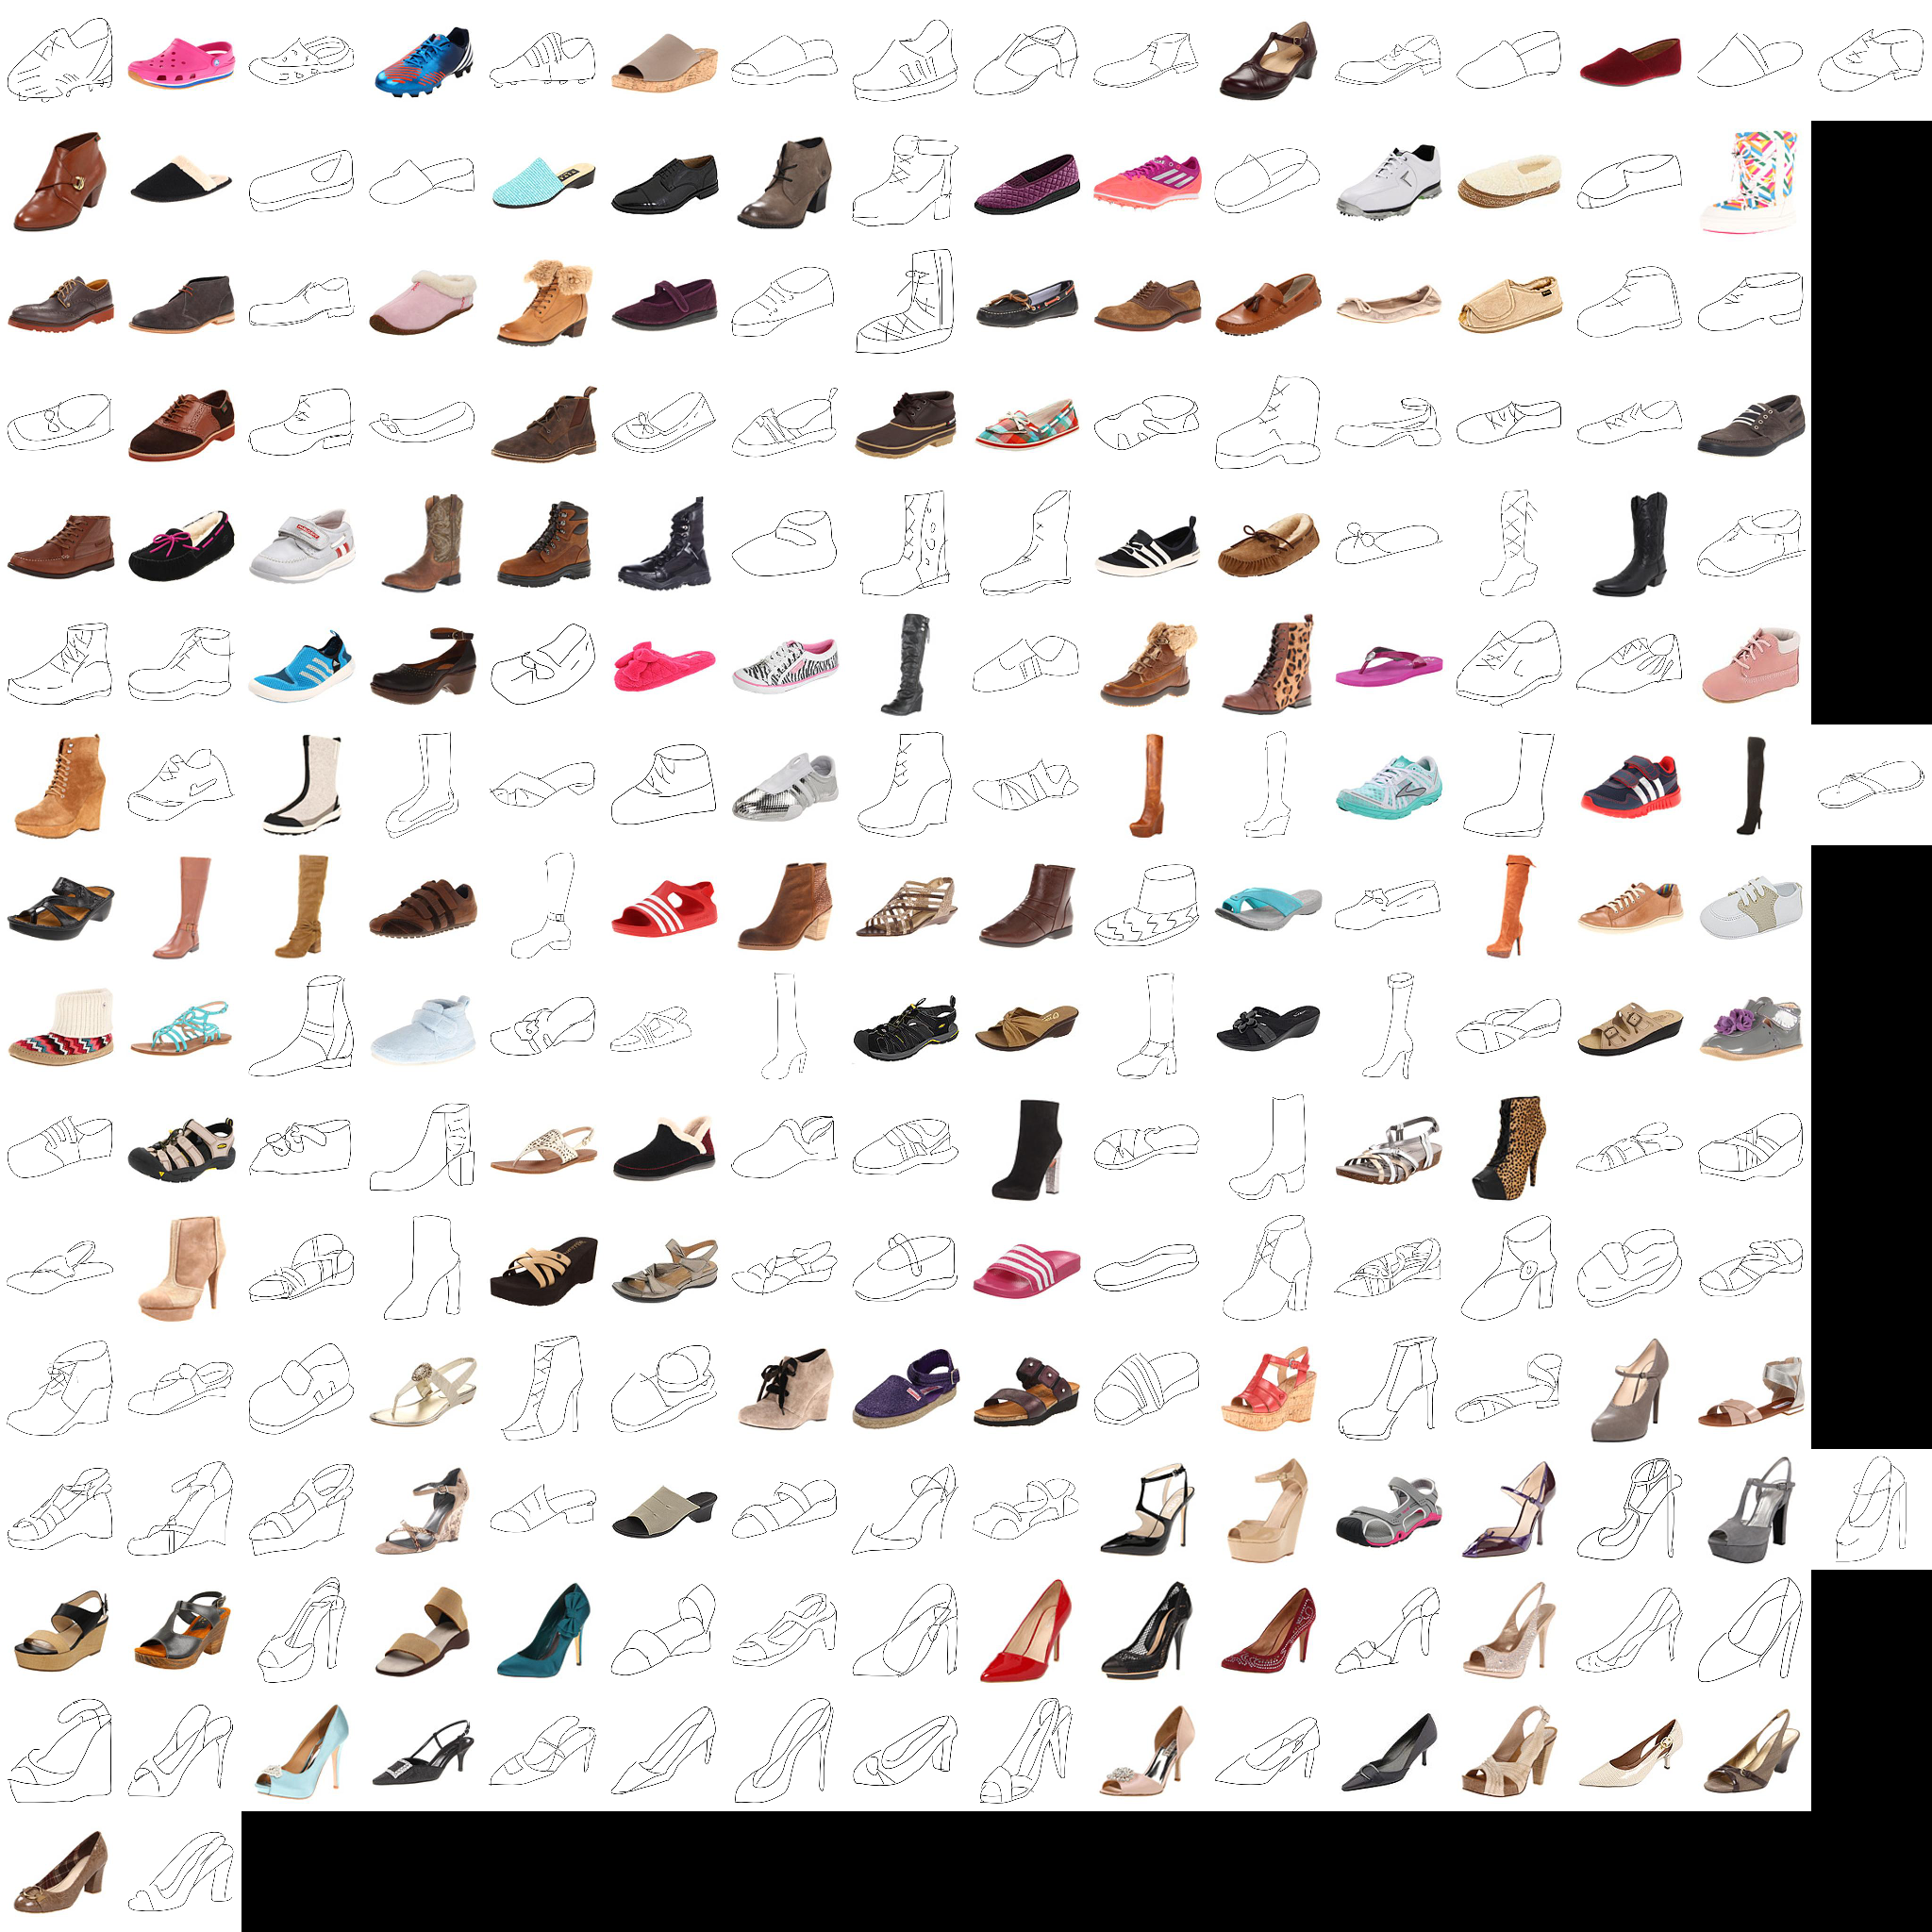

In [61]:
show_image

In [43]:
count = 0
num = 230
while num:
    count += 1
    num = num // 2

In [44]:
count

8

In [45]:
2**8

256

In [46]:
2**7

128

In [62]:
np.arange(230)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [63]:
idx = np.arange(230)

In [68]:
np.shape(np.unique(np.random.choice(idx, 128, replace=False)))

(128,)

In [69]:
idx = np.random.choice(idx, 128, replace=False)

In [73]:
x[idx]

array([11.566154  , 13.754098  , 15.976273  , 24.153154  , 12.656277  ,
       15.774439  ,  5.2949862 , 13.420107  , 13.452271  , 15.412174  ,
       14.8123    , 25.151999  , 18.920143  , 16.981134  ,  3.456501  ,
       14.4843445 ,  4.5028267 , 21.520233  , 15.986656  ,  3.3583908 ,
        9.187209  , 11.12272   ,  8.860731  , 14.506048  , 10.74117   ,
       18.36918   , 16.792252  , 23.163132  ,  6.6805973 ,  6.8633714 ,
       24.05658   ,  9.014475  ,  5.2805424 , 18.333302  ,  7.672193  ,
        7.3969913 ,  3.590211  , 21.445152  , 19.11879   , 21.875523  ,
       10.834177  ,  3.6693573 , 16.403303  , 17.421913  , 17.678972  ,
       20.974808  , 16.119871  , 13.627449  ,  4.679534  , 16.074629  ,
        2.0940266 ,  4.799674  , 10.849236  , 13.696486  , 17.019787  ,
        4.9809847 ,  6.9531612 ,  7.9644313 , 16.273592  , 17.565874  ,
        2.3062725 ,  1.6913567 , 14.279266  ,  8.487228  , 21.996029  ,
       20.095066  , 14.588537  ,  3.0046272 , 18.43538   ,  5.56

In [74]:
x = x[idx]
y = y[idx]

In [79]:
x = np.reshape(x, (128, 1))

In [80]:
y = np.reshape(y, (128, 1))

In [83]:
xy = np.concatenate((x, y), axis=1)

In [85]:
xy

array([[11.566154  ,  3.5404797 ],
       [13.754098  , 10.521891  ],
       [15.976273  ,  9.04171   ],
       [24.153154  ,  7.1047754 ],
       [12.656277  , 30.91947   ],
       [15.774439  , 20.936375  ],
       [ 5.2949862 , 14.618082  ],
       [13.420107  ,  3.476017  ],
       [13.452271  ,  6.829136  ],
       [15.412174  ,  1.1150875 ],
       [14.8123    , 10.50713   ],
       [25.151999  , 12.087027  ],
       [18.920143  , 10.285168  ],
       [16.981134  ,  3.2532282 ],
       [ 3.456501  ,  7.9785404 ],
       [14.4843445 ,  5.1138344 ],
       [ 4.5028267 ,  7.7376757 ],
       [21.520233  ,  6.7602644 ],
       [15.986656  ,  9.979012  ],
       [ 3.3583908 , 16.460388  ],
       [ 9.187209  ,  9.427599  ],
       [11.12272   , 15.863352  ],
       [ 8.860731  , 16.315372  ],
       [14.506048  , 10.766569  ],
       [10.74117   , 16.004137  ],
       [18.36918   , 27.457996  ],
       [16.792252  , 20.78035   ],
       [23.163132  ,  8.5881605 ],
       [ 6.6805973 ,

In [87]:
for xi, yi in zip(x,y):
    print(xi, yi)

[11.566154] [3.5404797]
[13.754098] [10.521891]
[15.976273] [9.04171]
[24.153154] [7.1047754]
[12.656277] [30.91947]
[15.774439] [20.936375]
[5.2949862] [14.618082]
[13.420107] [3.476017]
[13.452271] [6.829136]
[15.412174] [1.1150875]
[14.8123] [10.50713]
[25.151999] [12.087027]
[18.920143] [10.285168]
[16.981134] [3.2532282]
[3.456501] [7.9785404]
[14.4843445] [5.1138344]
[4.5028267] [7.7376757]
[21.520233] [6.7602644]
[15.986656] [9.979012]
[3.3583908] [16.460388]
[9.187209] [9.427599]
[11.12272] [15.863352]
[8.860731] [16.315372]
[14.506048] [10.766569]
[10.74117] [16.004137]
[18.36918] [27.457996]
[16.792252] [20.78035]
[23.163132] [8.5881605]
[6.6805973] [23.973728]
[6.8633714] [17.301424]
[24.05658] [10.785257]
[9.014475] [29.211536]
[5.2805424] [21.199888]
[18.333302] [11.860115]
[7.672193] [13.018448]
[7.3969913] [28.881245]
[3.590211] [29.337223]
[21.445152] [5.585043]
[19.11879] [7.547591]
[21.875523] [12.285467]
[10.834177] [28.610506]
[3.6693573] [19.754135]
[16.403303] [27

In [88]:
np.sum(xy, axis=0)

array([1572.8899, 1897.2882], dtype=float32)